<a href="https://colab.research.google.com/github/kitagawaowo/Colabs/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fuerza bruta
Sistematicamente en todo el espacio de busqueda, no se busca minimizar el numero de operaciones

Si el orden si importa es una permutacion
<center>

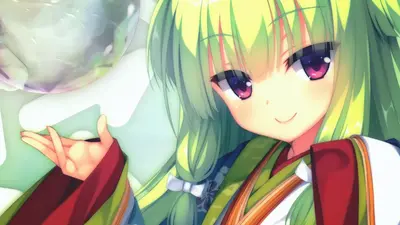



In [3]:
#@title Trabajo con listas
#Lista sencilla
A = [i + 1 for i in range(15)]
print(A)

B = [i for i in range(0, 20, 3)]
print(B)


# Listas con numeros aleatorios
import random as r

# Aleatorios enteros
C = [r.randint(9, 19) for _ in range(10)]
print(C)

# Aleatorios decimales
D = [round(r.uniform(0.4, 3.9), 2) for _ in range(10)]
print(D)

#Insertar un numero entero al final de la lista

C.append(24)
print(C)

#Insertar un numero decimal al final de la lista
D.append(0.88815)
print(D)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 3, 6, 9, 12, 15, 18]
[16, 12, 13, 14, 15, 13, 11, 13, 17, 13]
[2.2, 0.54, 3.69, 2.05, 3.03, 3.1, 3.88, 3.22, 1.1, 1.39]
[16, 12, 13, 14, 15, 13, 11, 13, 17, 13, 24]
[2.2, 0.54, 3.69, 2.05, 3.03, 3.1, 3.88, 3.22, 1.1, 1.39, 0.88815]


## Ordenamientos n^2
<center>

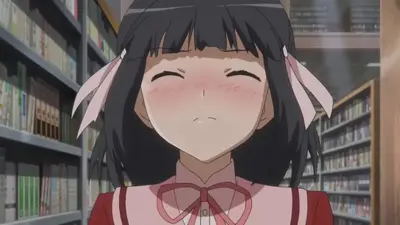




In [4]:
#@title Selection Sort
def selectionSort(arr):
    n = len(arr)
    for i in range(n - 1):
        minPos = i
        for j in range(i + 1, n):
            if arr[j] < arr[minPos]:
                minPos = j
        if i != minPos:
            arr[minPos], arr[i] = arr[i], arr[minPos]
    print(arr)

selectionSort(D)



[0.54, 0.88815, 1.1, 1.39, 2.05, 2.2, 3.03, 3.1, 3.22, 3.69, 3.88]


In [5]:
#@title Bubble Sort

def bubbleSort(arr):
    for i in range(0, len(arr) - 1):
        for j in range(i, len(arr) - 1):
            if (arr[j] > arr[j + 1]):
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    print(arr)

bubbleSort(B)

[0, 3, 6, 9, 12, 15, 18]


## Backtracking 
Dada una solución candidata S, se procede a
1. Verificar si S es solución. Si lo es, hacen algo con ella
(depende del problema).
2. Construyen todas las posibles extensiones de S, e
invocan recursivamente al algoritmo con todas ellas.

### Advantages
* El Backtraking puede resolver casi cualquier problema,
debido a su naturaleza de fuerza bruta.
Se puede utilizar para encontrar todas las soluciones
existentes si existe algún problema.
* Es una representación paso a paso de una solución a
un problema dado, que es muy fácil de entender.
Muy fácil de escribir el código y también de depurar.

### Disadvantages
* Es muy lento en comparación con otras soluciones.
* Dependiendo de los datos que tenga, existe la
posibilidad de realizar una búsqueda muy grande con
Backtracking y al final no encontrar ninguna
coincidencia con sus parámetros de búsqueda.
* Costo computacional muy alto, Backtracking es un
algoritmo recursivo que consume mucho de la
memoria y del procesador.
* Considerar usar el algoritmo de ramificación y poda
(para gran volumen de datos, consume menos
recursos a un coste de tiempo menor).

<center>

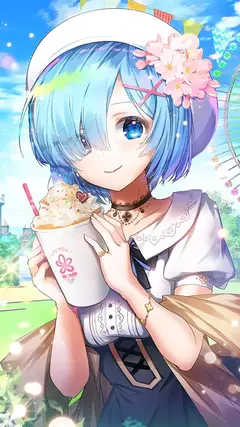

In [6]:
#@title Funcion enumerate

alumnos = ["Pedro", "Juan", "Rosa", "Diego"]
list(enumerate(alumnos))
list(enumerate(alumnos, 1) )

for i, item in enumerate(alumnos, 1):
    print(i, "->", item)
# same with simple for
for i in range(len(alumnos)):
    print(i, "->", alumnos[i])

1 -> Pedro
2 -> Juan
3 -> Rosa
4 -> Diego
0 -> Pedro
1 -> Juan
2 -> Rosa
3 -> Diego


In [7]:
#@title Template to draw a board
def draw(tablero):
  n = len(tablero)
  #np.zeros devuelve un array del tamaño y tipo indicados inicializando sus valores con ceros
  b = np.zeros((n, n, 3), dtype=int)
  #print(b)
  b += [255, 128, 80]

  b[::2, ::2] = [255, 225, 120]
  b[1::2, 1::2] = [255, 225, 120]

  _, ax = plt.subplots()
  ax.imshow(b)
  for fil, col in enumerate(tablero):
    ax.text(col, fil, u"\u265b", fontsize=200/n, va="center", ha="center")
  ax.set(xticks=[], yticks=[])
  '''
  La función set(xticks=[], yticks=[]) toma un objeto de lista como argumento. Los elementos de la lista indican las posiciones en la acción correspondiente donde se mostrarán las marcas. 
  Este método marcará los puntos de datos en las posiciones dadas con marcas.
  '''

In [8]:
import numpy as np
import matplotlib.pyplot as plt

tablero = [4, 7, 2, 6, 1, 0, 3, 5]
#Comprobar la tabla
for fil, col in enumerate(tablero):
    print(f"Hay una reina en la fila {fil} columna {col}")


Hay una reina en la fila 0 columna 4
Hay una reina en la fila 1 columna 7
Hay una reina en la fila 2 columna 2
Hay una reina en la fila 3 columna 6
Hay una reina en la fila 4 columna 1
Hay una reina en la fila 5 columna 0
Hay una reina en la fila 6 columna 3
Hay una reina en la fila 7 columna 5


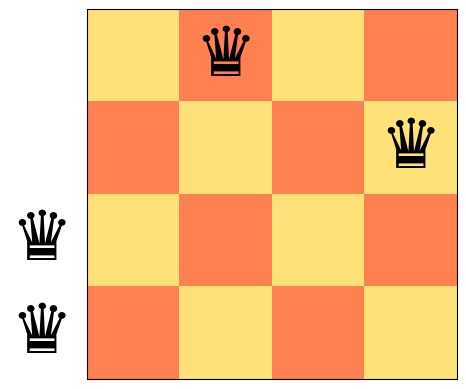

In [25]:
#@title Funcion para validar el tablero

def validar(tablero, fil, col):
    for fil_i in range(fil):
        col_i = tablero[fil_i]
        delta = fil - fil_i # Fila anterior
        #Comprobamos que no colisionen las reinas
        if col in (col_i, col_i + delta, col_i - delta):
            return False
    return True

# Pregunta; podemos colocar una reina en la posicion fila 2 col 0?
# Utilizamos la funcion assert para controlar la respuesta que da la funcion validar

tablero1 = [1, 3, -1, -1]
assert validar(tablero1, 2, 0) == True
draw(tablero1)

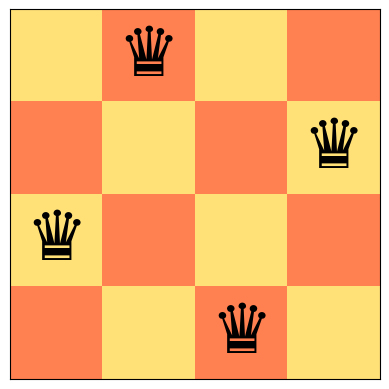

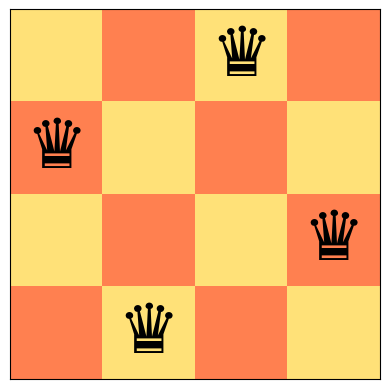

In [26]:
#Generalizar la funcion

def nqueens(tablero, fil):
    n  = len(tablero)
    if fil >= n:
        #Dibujar el tablero cuando se evalua la ultima fila
        draw(tablero)
    else:
        for col in range(n):
            if validar(tablero, fil, col):
                tablero[fil] = col
                # llamada recursiva para evaluar la siguiente fila del tablero hasta la ultima fila
                nqueens(tablero, fil + 1)


n = 4
tablero2 = [-1] * n
nqueens(tablero2, 0)


<center>

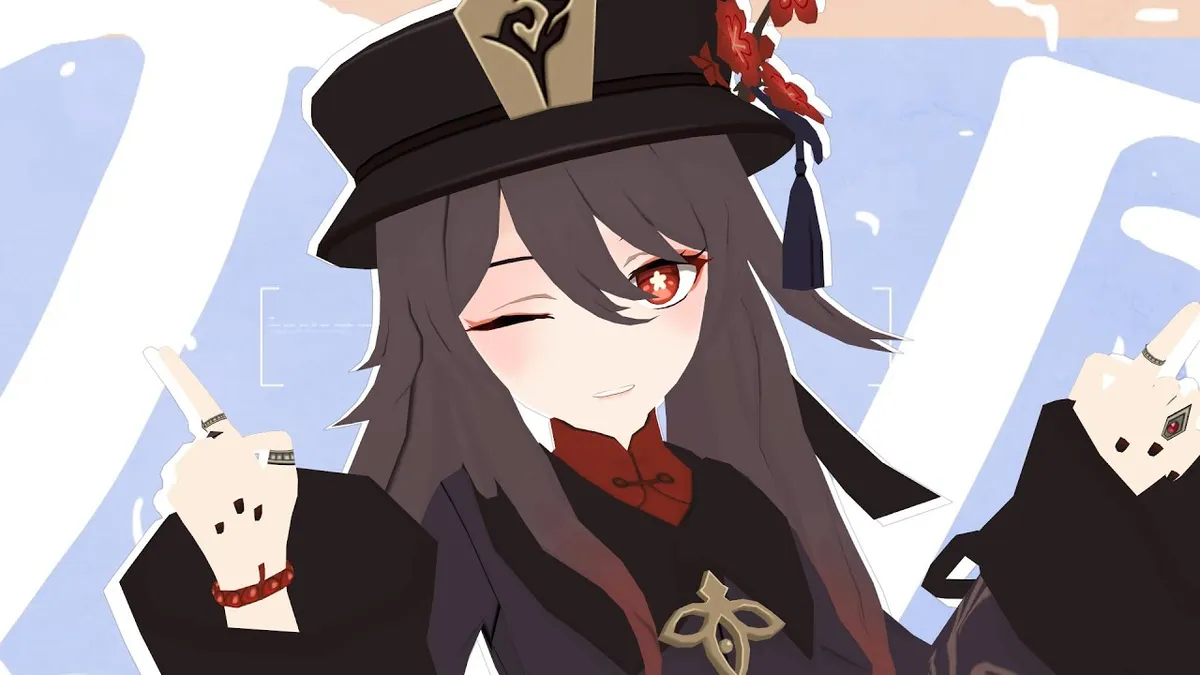